In [1]:
## importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Melbourne_housing_extra_data.csv')

In [3]:
data.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0


In [4]:
data.tail(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
19737,Yarraville,2 Adeney St,2,h,750000.0,SP,hockingstuart,29/07/2017,6.3,3013.0,...,2.0,2.0,1999.0,199.0,140.00,Darebin,-37.75948,144.99615,Western Metropolitan,6543.0
19738,Yarraville,54 Pentland Pde,6,h,2450000.0,VB,Village,29/07/2017,6.3,3013.0,...,2.0,1.0,2011.0,238.0,118.00,Hume,-37.70322,144.88236,Western Metropolitan,6543.0
19739,Yarraville,10/127 Somerville Rd,3,t,645000.0,SP,Jas,29/07/2017,6.3,3013.0,...,1.0,1.0,1980.0,0.0,66.32,Hume,-37.69815,144.88019,Western Metropolitan,6543.0


In [6]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19740 entries, 0 to 19739
Data columns (total 21 columns):
Suburb           19740 non-null object
Address          19740 non-null object
Rooms            19740 non-null int64
Type             19740 non-null object
Price            15396 non-null float64
Method           19740 non-null object
SellerG          19740 non-null object
Date             19740 non-null object
Distance         19732 non-null float64
Postcode         19732 non-null float64
Bedroom2         15327 non-null float64
Bathroom         15327 non-null float64
Car              15327 non-null float64
Landsize         14944 non-null float64
BuildingArea     8617 non-null float64
YearBuilt        9351 non-null float64
CouncilArea      15296 non-null object
Lattitude        15448 non-null float64
Longtitude       15448 non-null float64
Regionname       19732 non-null object
Propertycount    19732 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 3.2+ MB


In [8]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             4344
Method               0
SellerG              0
Date                 0
Distance             8
Postcode             8
Bedroom2          4413
Bathroom          4413
Car               4413
Landsize          4796
BuildingArea     11123
YearBuilt        10389
CouncilArea       4444
Lattitude         4292
Longtitude        4292
Regionname           8
Propertycount        8
dtype: int64

In [9]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [10]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

In [11]:
len(data['Date'].unique())/4

13.0

In [13]:
var = data[data["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").std()
count = data[data["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").count()
mean = data[data["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").mean()

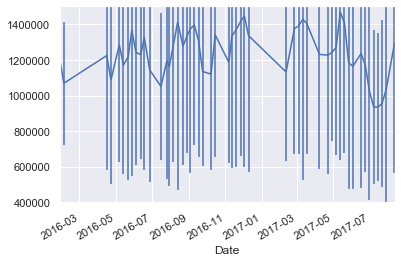

In [14]:
mean["Price"].plot(yerr=var["Price"], ylim=(400000,1500000))

In [15]:
means = data[(data["Type"]=="h") & (data["Distance"]<13)].sort_values("Date", ascending=False).groupby("Date").mean()

errors = data[(data["Type"]=="h") & (data["Distance"]<13)].sort_values("Date", ascending=False).groupby("Date").std()

In [16]:
means.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

In [17]:
errors.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

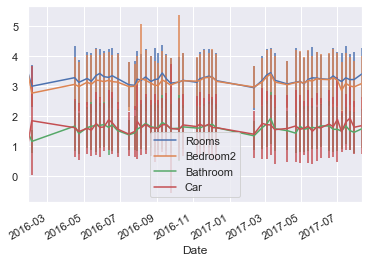

In [18]:
#fig, ax = plt.subplots()
means.drop(["Price",
            "Postcode",
            
           "Longtitude","Lattitude",
           "Distance","BuildingArea", "Propertycount","Landsize","YearBuilt"],axis=1).plot(yerr=errors)

In [19]:
data[data["Type"] == "h"].sort_values("Date",ascending=False).groupby("Date").mean()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Date,,,,,,,,,,,,,
2016-01-28,3.500000,1.205000e+06,10.100000,3126.500000,3.500000,1.500000,1.000000,649.000000,198.000000,1910.000000,-37.829800,145.087850,4361.000000
2016-02-04,2.958333,1.068888e+06,10.245833,3091.083333,2.842105,1.368421,1.842105,484.947368,126.333333,1963.076923,-37.834721,144.997153,5622.791667
2016-04-16,3.271552,1.224499e+06,8.964655,3091.806034,3.089947,1.645503,1.645503,481.984127,154.068376,1942.500000,-37.803719,144.989346,7363.405172
2016-04-23,3.181818,1.087059e+06,8.721818,3078.445455,3.034483,1.459770,1.528736,908.218391,145.666667,1941.431373,-37.784748,144.975782,7364.154545
2016-05-07,3.279152,1.285205e+06,8.995760,3099.922261,3.164502,1.627706,1.670996,553.207792,166.137931,1945.369427,-37.816396,144.997093,7151.759717
2016-05-14,3.191176,1.171023e+06,8.664216,3093.058824,3.089286,1.648810,1.577381,460.934524,174.868132,1948.295238,-37.804652,144.992144,7352.269608
2016-05-22,3.330144,1.218111e+06,9.051675,3093.019139,3.165680,1.639053,1.751479,505.349112,175.427184,1948.227273,-37.804988,144.984088,6654.267943
2016-05-28,3.452055,1.366617e+06,9.108219,3102.407534,3.220339,1.665254,1.656780,544.563559,178.414286,1948.051613,-37.807166,144.998750,7195.623288
2016-06-04,3.356164,1.242345e+06,9.271233,3096.415525,3.220339,1.734463,1.700565,513.435028,182.311927,1947.388889,-37.816580,144.993675,6640.922374


In [23]:
pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)
data[(data["Type"]=="h") & 
          (data["Distance"]<14) &
          (data["Distance"]>13.7) 
          #&(dataframe["Suburb"] =="Northcote")
         ].sort_values("Date", ascending=False).dropna().groupby(["Suburb","SellerG"]).mean()

Rooms   Price  Distance  Postcode  Bedroom2  \
Suburb            SellerG                                                      
Albion            Barry            2.3  735.0k      13.9      3.0k       2.3   
                  Bells            3.0  782.0k      13.9      3.0k       3.3   
                  Sweeney          3.0  596.5k      13.9      3.0k       3.0   
                  hockingstuart    3.0  730.0k      13.9      3.0k       3.0   
Altona            Barlow           3.0    1.1M      13.8      3.0k       3.0   
                  Compton          2.0  535.6k      13.8      3.0k       2.0   
                  Greg             3.8    1.1M      13.8      3.0k       3.8   
                  hockingstuart    3.0  928.8k      13.8      3.0k       3.0   
Bentleigh East    Beller           3.0  900.0k      13.9      3.2k       3.0   
                  Buxton           3.3    1.1M      13.9      3.2k       3.3   
                  C21              3.3  907.7k      13.9      3.2k       3.3   
                  First            4.0    1.0M      13.9      3.2k       3.0   
                  Gary             3.5    1.2M      13.9      3.2k       3.5   
                  Hodges           4.2    1.3M      13.9      3.2k       4.0   
                  Marshall         4.0    1.4M      13.9      3.2k       4.0   
                  Nick             3.0    1.0M      13.9      3.2k       3.0   
                  RT               4.0    1.2M      13.9      3.2k       4.0   
                  Ray              3.0  896.7k      13.9      3.2k       3.0   
                  Woodards         3.2    1.1M      13.9      3.2k       3.2   
                  hockingstuart    3.7    1.4M      13.9      3.2k       3.7   
Doncaster         Barry            3.6    1.4M      13.9      3.1k       3.6   
                  Fletchers        3.0    1.2M      13.9      3.1k       3.0   
                  Jellis           3.9    1.5M      13.9      3.1k       3.9   
                  Philip           3.5    1.4M      13.9      3.1k       3.5   
                  RW               4.0    1.4M      13.9      3.1k       4.0   
                  Ray              3.4    1.2M      13.9      3.1k       3.3   
                  Vic              3.0    1.1M      13.9      3.1k       3.0   
                  hockingstuart    3.5    1.5M      13.9      3.1k       3.0   
Hampton           Hodges           4.0    2.6M      13.8      3.2k       4.0   
Templestowe Lower Barry            3.8    1.2M      13.8      3.1k       3.8   
                  Jellis           3.6    1.3M      13.8      3.1k       3.6   
                  Mason            4.0  790.0k      13.8      3.1k       4.0   
                  Philip           3.3    1.0M      13.8      3.1k       3.3   
                  RT               3.0  650.0k      13.8      3.1k       3.0   
                  Zahn             4.0    1.2M      13.8      3.1k       4.0   
                  hockingstuart    4.5  875.0k      13.8      3.1k       4.5   
Viewbank          Barry            3.0  770.0k      13.8      3.1k       3.0   
                  Buckingham       3.0  880.0k      13.8      3.1k       3.0   
                  Darren           4.0    1.0M      13.8      3.1k       4.0   
                  Fletchers        4.0    1.2M      13.8      3.1k       4.0   
                  Miles            3.6  903.0k      13.8      3.1k       3.8   
                  Morrison         3.0  820.0k      13.8      3.1k       3.0   
                  Nelson           4.0  981.7k      13.8      3.1k       4.0   
                  Ray              3.0  765.0k      13.8      3.1k       3.0   

                                 Bathroom  Car  Landsize  BuildingArea  \
Suburb            SellerG                                                
Albion            Barry               1.0  1.0     634.3         118.0   
                  Bells               1.3  2.3     741.0         126.0   
                  Sweeney             1.5  1.5     651.0

d:\Anaconda4\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
d:\Anaconda4\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


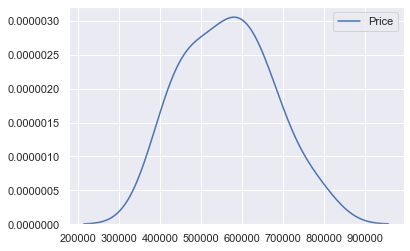

In [24]:
sns.kdeplot(data[(data["Suburb"] == "Northcote")
                & (data["Type"] == "u")
                & (data["Rooms"] == 2)]["Price"])